## 라이브러리 impport

In [7]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

## 데이터 로딩

In [51]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [46]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


- hour_bef_precipitation만 범주형 데이터

In [4]:
print(train.shape)
print(test.shape)

(1459, 11)
(715, 10)


## 결측치 평균으로 대체

In [52]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

### 전체 기온 평균

In [23]:
train['hour_bef_temperature'].mean()

16.717433081674653

### 시간당 기온의 평균

In [20]:
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

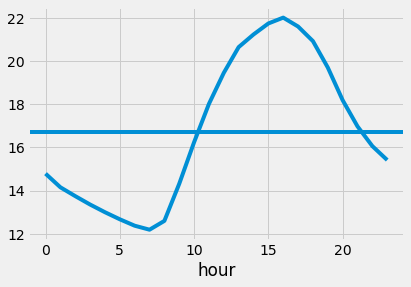

In [22]:
train.groupby('hour').mean()['hour_bef_temperature'].plot()   # 시간당 기온의 평균
plt.axhline(train.groupby('hour').mean()['hour_bef_temperature'].mean())  # 전체 기온의 평균

Text(16, 280, 'leave work')

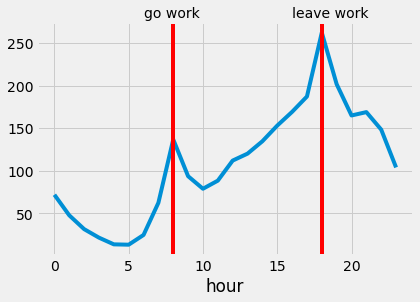

In [15]:
train.groupby(['hour'])['count'].mean().plot()
plt.axvline(x=8,color='r')
plt.axvline(x=18,color='r')
plt.text(6, 280, 'go work')
plt.text(16, 280, 'leave work')

### 결측치 시간당 기온으로 대체

In [53]:
train['hour_bef_temperature'].fillna(value = train.groupby('hour').mean()['hour_bef_temperature'].mean(), inplace = True)

In [54]:
train['hour_bef_temperature']

0       16.3
1       20.1
2       13.9
3        8.1
4       29.5
        ... 
1454    16.8
1455    10.8
1456    18.3
1457    20.7
1458    21.1
Name: hour_bef_temperature, Length: 1459, dtype: float64

In [55]:
train['hour_bef_temperature'].isna().sum()

0

## 모든 결측치 대체

In [57]:
train_isna_sum = train.isna().sum()

In [58]:
na_columns = train_isna_sum[train_isna_sum != 0].index

In [60]:
def fill_bicycle_na(df, column) :
    
    df[column] = df[column].fillna(value = df.groupby('hour').mean()[column].mean())

In [61]:
for col in na_columns:
    
    fill_bicycle_na(train, col)
    
    print(col, '결측값 대체 완료')

hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [63]:
train.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

## test 데이터셋도 결측치 대체

In [64]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [65]:
test_isna_sum = test.isna().sum()

In [66]:
test_na_columns = test_isna_sum[test_isna_sum != 0].index

In [67]:
for col in test_na_columns:
    fill_bicycle_na(test, col)
    print(col, '대체 완료')

hour_bef_temperature 대체 완료
hour_bef_precipitation 대체 완료
hour_bef_windspeed 대체 완료
hour_bef_humidity 대체 완료
hour_bef_visibility 대체 완료
hour_bef_ozone 대체 완료
hour_bef_pm10 대체 완료
hour_bef_pm2.5 대체 완료


In [68]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [70]:
train.to_csv("train_null_only.csv", index = False)

In [71]:
test.to_csv("test_null_only.csv", index = False)